In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

In [2]:
from torch_geometric.datasets import TUDataset
tu_data = TUDataset(root="tutorial1",name= "Yeast")
# https://pytorch-geometrimport networkx as nx
t1 = tu_data[1]
t1.x

Processing...
Done!


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [3]:
dataset = t1
print(f'Dataset: {dataset}')
print('----------------')
print(f'Number of graphs: {len(dataset)}')

Dataset: Data(edge_index=[2, 108], x=[53, 74], edge_attr=[108, 3], y=[1])
----------------
Number of graphs: 4


In [4]:
print(f'Number of features: {dataset.num_features}')

Number of features: 74


In [5]:
t1.num_nodes

53

In [7]:
t2 = tu_data[2]
G1 = to_networkx(t1, node_attrs=["x"], edge_attrs=["edge_attr"])
G2 = to_networkx(t2, node_attrs=["x"], edge_attrs=["edge_attr"])

### Radius of Graphs

## Two approaches to create a simple curvature for network graphs in Python:

### 1. Manual Node Positioning with Curvature Function

In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def curved_layout(G, radius, curvature):
  """
  Assigns positions to nodes based on a curvature function.

  Args:
    G: NetworkX graph object.
    radius: Radius of the base circle.
    curvature: Function defining the curvature (e.g., sin, cos).

  Returns:
    Dictionary mapping nodes to their (x, y) positions.
  """
  theta = nx.circular_layout(G)  # Get initial circular layout
  positions = {}
  for i, node in enumerate(G.nodes):
    angle = 2*np.pi * i / len(G.nodes)  # Distribute nodes evenly
    offset = curvature(angle) * radius  # Apply curvature
    positions[node] = (radius + offset * np.cos(angle), offset * np.sin(angle))
  return positions


# Define curvature function (e.g., sine wave)
def sine_curvature(angle):
  return 0.2 * np.sin(angle)  # Adjust amplitude for desired curvature


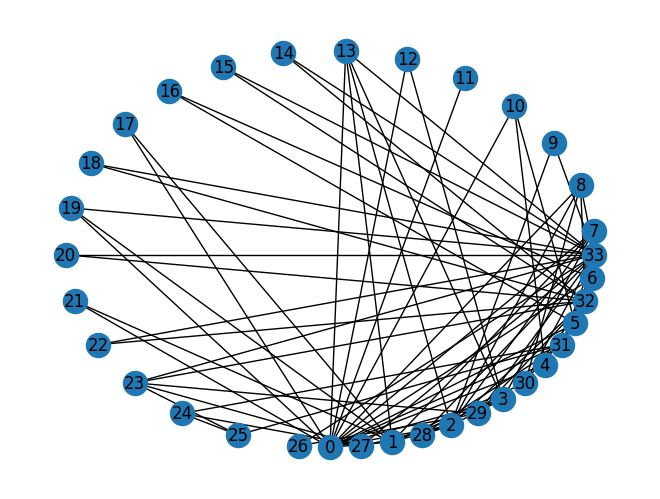

In [15]:

# Get curved positions
positions = curved_layout(G1, 1, sine_curvature)

# Draw the graph
nx.draw(G, positions, with_labels=True)
plt.show()

### 2. Force-Directed Layout with Curvature Bias:

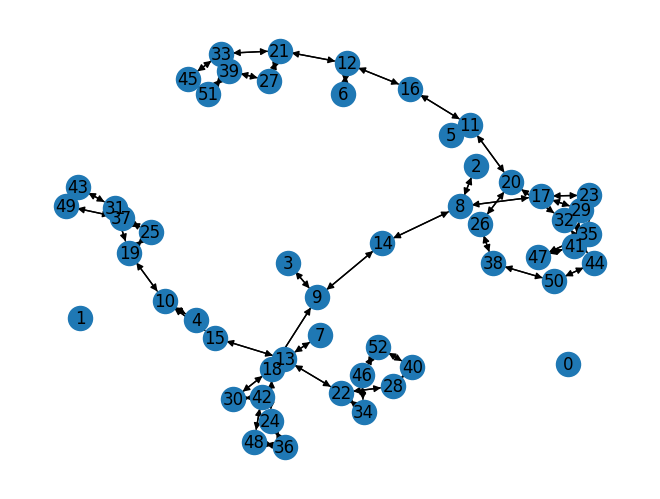

In [24]:
import networkx as nx

def curved_weight(edge, bias):
  """
  Assigns higher weights to edges on one side of the graph for curvature.

  Args:
    edge: A NetworkX edge tuple (source, target).
    bias: Float value determining the weight increase (0 for no bias).

  Returns:
    Modified weight for the edge.
  """
  source, target = edge
  if source < target:  # Increase weight for edges on this side
    return 1 + bias
  else:
    return 1



# Adjust bias for desired curvature (0 for no bias)
bias = 0.2

# Set edge weights with curvature bias
for edge in G1.edges():
  G1.edges[edge]["weight"] = curved_weight(edge, bias)

# Perform Fruchterman-Reingold layout with custom weights
pos = nx.spring_layout(G1, iterations=200, k=1, weight="weight")  # Use weight key

# Draw the graph (optional)
nx.draw(G1, pos, with_labels=True)
plt.show()
